# Set up search for binaries in Hipparchos

In [1]:
import os
import sys
sys.path.append('../src')
import P_binary
import P_random
import P_posterior
import const as c
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
import pickle

%matplotlib inline

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### Read in catalog

In [2]:
# Read in sample from Tycho-2 table
filename = ('../data/hipparchos/hip2.dat')
readme = ('../data/hipparchos/Readme')
hip_orig = Table.read(filename, format='cds', guess=False, readme=readme)

print hip_orig.colnames

['HIP', 'Sn', 'So', 'Nc', 'RArad', 'DErad', 'Plx', 'pmRA', 'pmDE', 'e_RArad', 'e_DErad', 'e_Plx', 'e_pmRA', 'e_pmDE', 'Ntr', 'F2', 'F1', 'var', 'ic', 'Hpmag', 'e_Hpmag', 'sHp', 'VA', 'B-V', 'e_B-V', 'V-I']


In [3]:
dtype = [('ID','i8'), ('ra','f8'), ('dec','f8'), ('mu_ra','f8'), ('mu_dec','f8'), \
         ('mu_ra_err','f8'), ('mu_dec_err','f8'), ('plx','f8'), ('plx_err','f8')]
hip = np.zeros(len(hip_orig), dtype=dtype)

hip['ID'] = hip_orig['HIP']
hip['ra'] = hip_orig['RArad'] * c.rad_to_deg
hip['dec'] = hip_orig['DErad'] * c.rad_to_deg
hip['mu_ra'] = hip_orig['pmRA']
hip['mu_dec'] = hip_orig['pmDE']
hip['mu_ra_err'] = hip_orig['e_pmRA']
hip['mu_dec_err'] = hip_orig['e_pmDE']
hip['plx'] = hip_orig['Plx']
hip['plx_err'] = hip_orig['e_Plx']



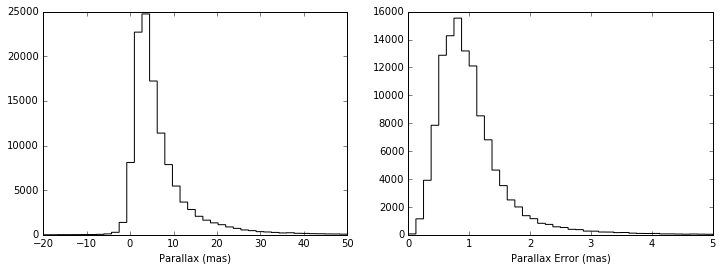

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].hist(hip['plx'], histtype='step', color='k', bins=40, range=(-20, 50))
ax[1].hist(hip['plx_err'], histtype='step', color='k', bins=40, range=(0, 5))

ax[0].set_xlabel('Parallax (mas)')
ax[1].set_xlabel('Parallax Error (mas)')

plt.show()

In [4]:
p_out = P_posterior.match_binaries(hip)

Generating binaries...
We are testing 117955 stars...
0 5.10544919968
70 71 0.00426267874376 -22.8 -19.03 -23.59 -20.52 5.94 3.08 7.3 1.36 [  7.26721046e-10] 5.44401727159e-09 [ 0.78927863]
185 190 0.0176037364174 -44.25 -114.37 -48.74 -117.9 12.92 0.92 11.43 0.93 [  6.83217830e-11] 1.30935092601e-09 [ 0.90550201]


KeyboardInterrupt: 